## Analysis to find top words in sections in 2016

In [9]:
import glob   # imported glob
import os   # imported os
import csv  # imported csv
import json
files = glob.glob(r'D:\data\data\2015\*')

In [10]:
data = []
for p in files:     #for loop to read every file of the corpus
    with open(p, 'r') as f:   #open files
        json_file = json.load(f)
        json_keys = json_file.keys()
        for x in json_keys: 
            if x == 'response':
                response_file = json_file['response']
                response_keys = response_file.keys()
                for y in response_keys:
                    if y == 'docs':
                        docs_file = json_file['response']['docs']
                        i = 0
                        for z in docs_file:
                            section_name = json_file['response']['docs'][i]['section_name']
                            pub_date = json_file['response']['docs'][i]['pub_date'][0:10]
                            id = json_file['response']['docs'][i]['_id']
                            if section_name is not None:
                                a = section_name.replace('  ','')
                                g = a.replace(' ','')
                                b = g.replace(':','')
                                d = b.replace('/','')
                                if d != 'false':
                                    data.append(section_name)
                                    sectionName = r"Question_2_files\\" + d
                                    presentSection=os.path.isdir(sectionName)
                                    os.makedirs(sectionName, exist_ok=True)    #if folder doesn't exist then create one
                                    with open(sectionName+"\\" + pub_date + id + '.json', 'w') as outfile:
                                        json.dump(json_file['response']['docs'][i], outfile)                       
                                    i += 1

In [16]:
from collections import Counter
counts = Counter(data)

In [17]:

dict_count= dict(counts)

In [18]:
dict_list = []
temp = []
for key, value in dict_count.items():
    temp = [key,value]
    dict_list.append(temp)
print(dict_list)

[['Opinion', 2405], ['Today’s Paper', 43], ['World', 3067], ['NYT Now', 339], ['Your Money', 112], ['Technology', 501], ['Obituaries', 8], ['Theater', 286], ['Style', 76], ['T Magazine', 813], ['Universal', 112], ['The Upshot', 285], ['Sunday Review', 24], ['Times Insider', 113], ['Crosswords & Games', 137], ['Multimedia', 6], ['Science', 321], ['Learning', 2], ['Great Homes & Destinations', 27], ['Magazine', 308], ['Blogs', 254], ['Fashion & Style', 1389], ['Public Editor', 8], ['Crosswords/Games', 3], ['Automobiles', 36], ['Sports', 3131], ['Movies', 584], ['N.Y. / Region', 1721], ['Corrections', 181], ['Job Market', 26], ['Travel', 349], ['Education', 311], ['Giving', 13], ['Books', 628], ['U.S.', 3301], ['Home & Garden', 12], ['Food', 321], ['Times Topics', 15], ['Real Estate', 427], ['Health', 355], ['Multimedia/Photos', 187], ['Business Day', 2227], ['Arts', 2330]]


In [19]:
count=1
with open("freq_analysis"+'.csv','w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Word','Rank', 'Frequency'])
    for r in dict_list:
        writer.writerow([r[0],count,r[1]])
        count+=1

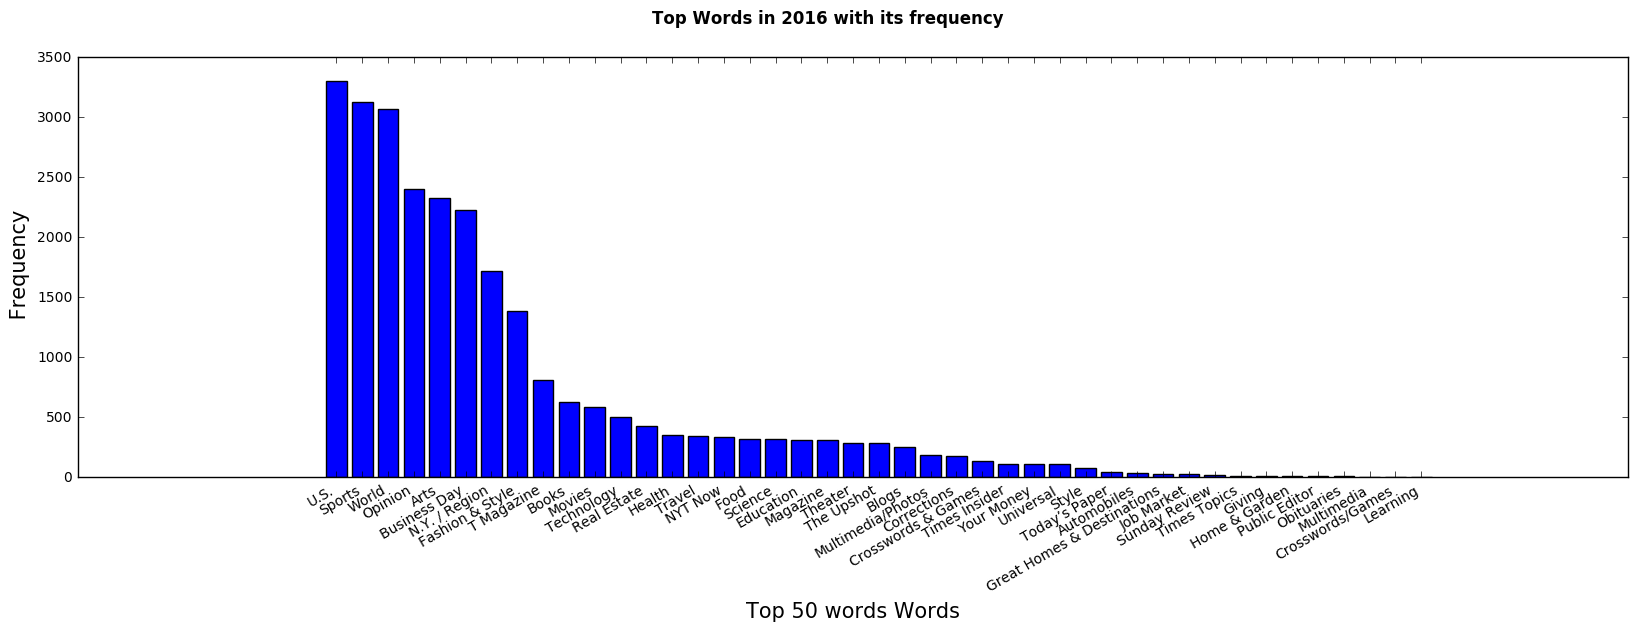

In [20]:
import matplotlib.pyplot as plt
import csv
import operator
freq = {}
with open('freq_analysis.csv') as f:
    reader = csv.DictReader(f)
    i= 0
    for r in reader:
        if i == 55:break
        freq[r['Word']] = int(r['Frequency'])
        i+=1
freq = sorted(freq.items(), key=operator.itemgetter(1), reverse=True)
labels, values = zip(*freq)
plt.bar(range(len(freq)), values, align='center')
plt.xticks(range(len(freq)), labels)
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.suptitle('Top Words in 2016 with its frequency' , fontsize=12, fontweight='bold')
plt.ylabel(" Frequency", fontsize=15)
plt.xlabel("Top 50 words Words", fontsize=15)
fig.autofmt_xdate()
plt.show()